In [7]:
from google.colab import files

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import pathlib

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nmerahul","key":"a27c0cf5f69eecfc4b828ee7b3631dd6"}'}

In [ ]:
!rm -r ORIGA

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `rm kaggle(1).json'


In [5]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 777 ~/.kaggle/kaggle.json
!kaggle datasets download -d sshikamaru/glaucoma-detection
!unzip glaucoma-detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 401M/402M [00:15<00:00, 28.8MB/s]
100% 402M/402M [00:15<00:00, 26.4MB/s]
Archive:  glaucoma-detection.zip
  inflating: ACRIMA/Images/Im001_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im002_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im003_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im004_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im005_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im006_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im007_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im008_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im009_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im010_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im011_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im012_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im013_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im014_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im015_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im016_ACRIMA.jpg  
  inflating: ACRIMA/Images/Im017_ACRIMA.jpg  
  inflat

In [ ]:
!chmod -R 777 /content/Fundus_Train_Val_Data/



# New Section

In [ ]:
import cv2 as cv
import os

data_path = os.listdir('/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/')
for i in range(len(data_path)):
  data = os.listdir(f'/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/{data_path[i]}')
  for j in range(len(data)):
    Glaucoma_data = os.listdir(f'/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/{data_path[i]}/{data[j]}')
    for k in range(len(Glaucoma_data)):
      img_path = f'/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/{data_path[i]}/{data[j]}/{Glaucoma_data[k]}'
      img = cv.imread(img_path)
      #preprocessing
      #resizing
      cv.resize(img, (3000,2000))
      #addaptive histogram flattening
      hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
      h,s,v = cv.split(hsv)
      clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
      result = clahe.apply(v)
      #postprocessing
      hsv = cv.merge((h, s, result))
      rgb = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
      cv.imwrite(img_path, rgb)
      print('Image: ',img_path)

Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/076.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/419.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/580.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/512.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/519.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/362.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/486.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/395.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/116.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/312.jpg
Image:  /content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Posit

In [45]:
#Data RIMONE
data_train = pathlib.Path('/content/drive/My Drive/Colab Notebooks/partitioned_by_hospital/Train/')
data_val = pathlib.Path('/content/drive/My Drive/Colab Notebooks/partitioned_by_hospital/Validation/')

In [27]:
#Data ACRIMA
data_train = pathlib.Path('/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/')
data_val = pathlib.Path('/content/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/')

In [46]:
#Data RIMONE
image_count_train = len(list(data_train.glob('**/*.png')))
image_count_val = len(list(data_val.glob('**/*.png')))
print(image_count_train, image_count_val)
num_samples = image_count_train + image_count_val

311 174


In [29]:
#Data Acrima
image_count_train = len(list(data_train.glob('**/*.jpg')))
image_count_val = len(list(data_val.glob('**/*.jpg')))
print(image_count_train, image_count_val)
num_samples = image_count_train + image_count_val

520 130


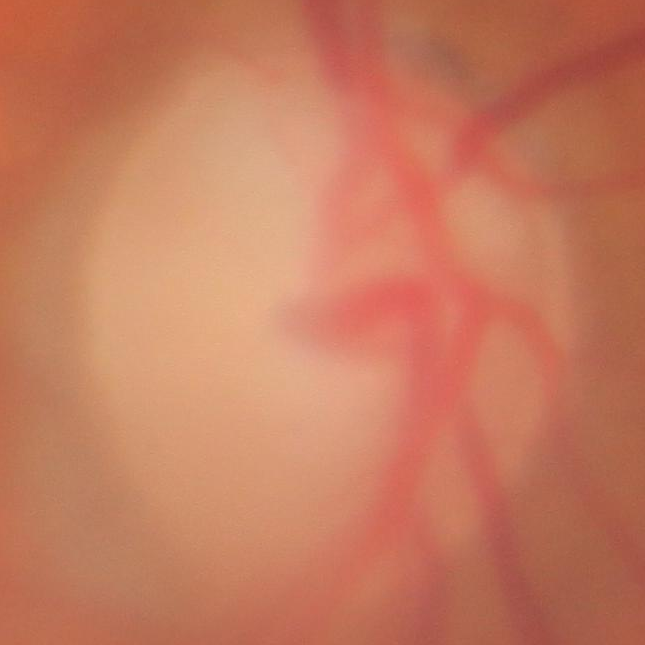

In [47]:
Glaucoma_Positive = list(data_train.glob('Glaucoma_Positive/*'))
PIL.Image.open(str(Glaucoma_Positive[0]))

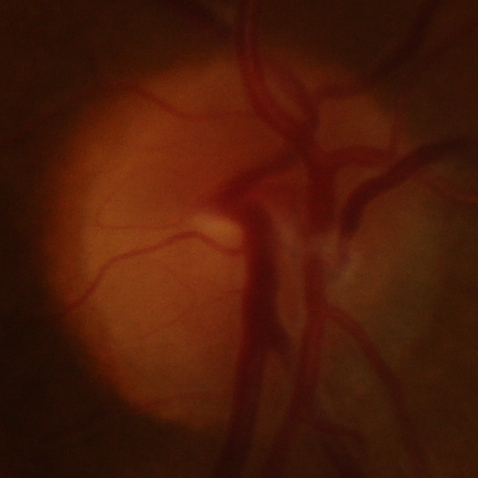

In [48]:
Glaucoma_Negative = list(data_train.glob('Glaucoma_Negative/*'))
PIL.Image.open(str(Glaucoma_Negative[0]))

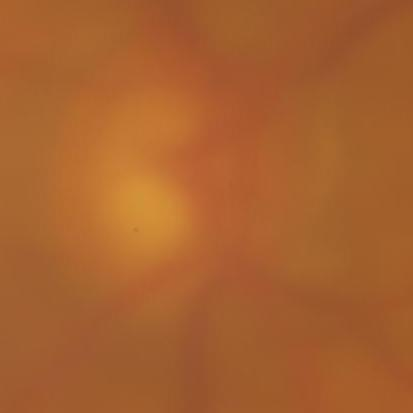

In [49]:
Glaucoma_Positive = list(data_val.glob('Glaucoma_Positive/*'))
PIL.Image.open(str(Glaucoma_Positive[0]))

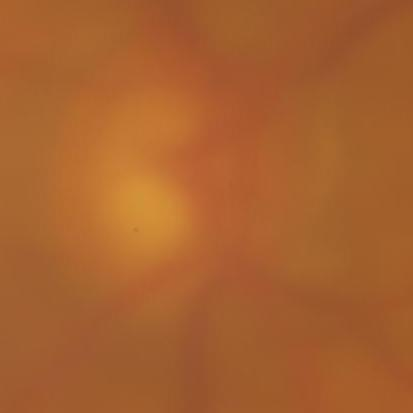

In [50]:
Glaucoma_Negative = list(data_val.glob('Glaucoma_Negative/*'))
PIL.Image.open(str(Glaucoma_Positive[0]))

In [51]:
batch_size = 8
img_height = 300
img_width = 300

In [52]:
#training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_train,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 311 files belonging to 2 classes.
Using 249 files for training.


In [53]:
#validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_val,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 174 files belonging to 2 classes.
Using 34 files for validation.


In [54]:
train_dataGen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

test_dataGen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

train_generator = train_dataGen.flow_from_directory(data_train,
                                                    target_size = (img_height, img_width),
                                                    batch_size = batch_size)

val_generator = test_dataGen.flow_from_directory(data_val,
                                                  target_size = (img_height, img_width),
                                                  batch_size = batch_size)


Found 311 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


In [55]:
#ResNet50 model
dropout = 0.5
num_classes = 2
fc_layers = [1024, 512, 256]

def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = layers.Flatten()(x)
    for fc in fc_layers:
        x = layers.Dense(fc, activation='relu')(x)
        x = layers.Dropout(dropout)(x)
    preditions = layers.Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model


base_model_1 = tf.keras.applications.resnet50.ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape = (img_height, img_width, 3)
)

model = build_model(
    base_model_1,
    dropout = dropout,
    fc_layers = fc_layers,
    num_classes = num_classes
)

94781440/94765736 [==============================] - 0s 0us/step


In [56]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(
    adam,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [64]:
epochs = 30 #250 #50
validation_steps = 10

#train_generator = tf.repeat(train_generator, repeats=3)
#val_generator = tf.repeat(val_genertor, repeats=3)

#train_generator = tf.data.Dataset(train_generator)
#val_generator = tf.data.Dataset(val_generator)


history = model.fit(
    train_generator,
    epochs = epochs,
    steps_per_epoch = len(train_generator),
    validation_data = val_generator,
    validation_steps = image_count_val//batch_size,
    shuffle = True
)

Epoch 1/30
39/39 [==============================] - 18s 452ms/step - loss: 0.1217 - accuracy: 0.9389 - val_loss: 0.7049 - val_accuracy: 0.7798
Epoch 2/30
39/39 [==============================] - 18s 454ms/step - loss: 0.1179 - accuracy: 0.9646 - val_loss: 0.6829 - val_accuracy: 0.7798
Epoch 3/30
39/39 [==============================] - 17s 448ms/step - loss: 0.1610 - accuracy: 0.9389 - val_loss: 0.5517 - val_accuracy: 0.7917
Epoch 4/30
39/39 [==============================] - 17s 442ms/step - loss: 0.1231 - accuracy: 0.9518 - val_loss: 0.6062 - val_accuracy: 0.7738
Epoch 5/30
39/39 [==============================] - 17s 433ms/step - loss: 0.1194 - accuracy: 0.9550 - val_loss: 0.6909 - val_accuracy: 0.7738
Epoch 6/30
39/39 [==============================] - 16s 405ms/step - loss: 0.1041 - accuracy: 0.9614 - val_loss: 0.8168 - val_accuracy: 0.7619
Epoch 7/30
39/39 [==============================] - 16s 403ms/step - loss: 0.1236 - accuracy: 0.9518 - val_loss: 0.7965 - val_accuracy: 0.7679

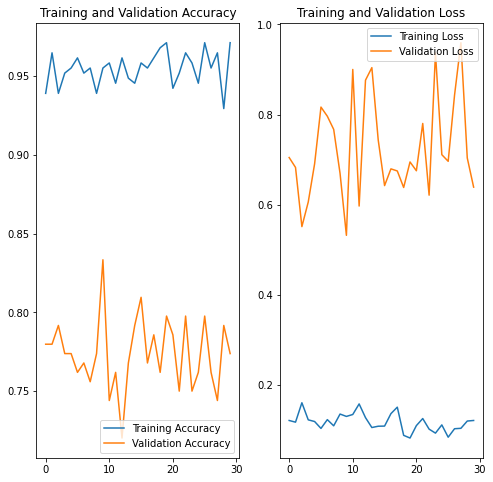

<Figure size 432x288 with 0 Axes>

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/Training_Summary.pdf')

In [67]:
model.save('GlaucomaDetection.h5')